In [2]:
import pandas as pd
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

# Project -
## Customer Tipping Patterns Analysis 

In [3]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\tip.csv")

# Data Info

In [4]:
df.shape

(244, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


<Axes: >

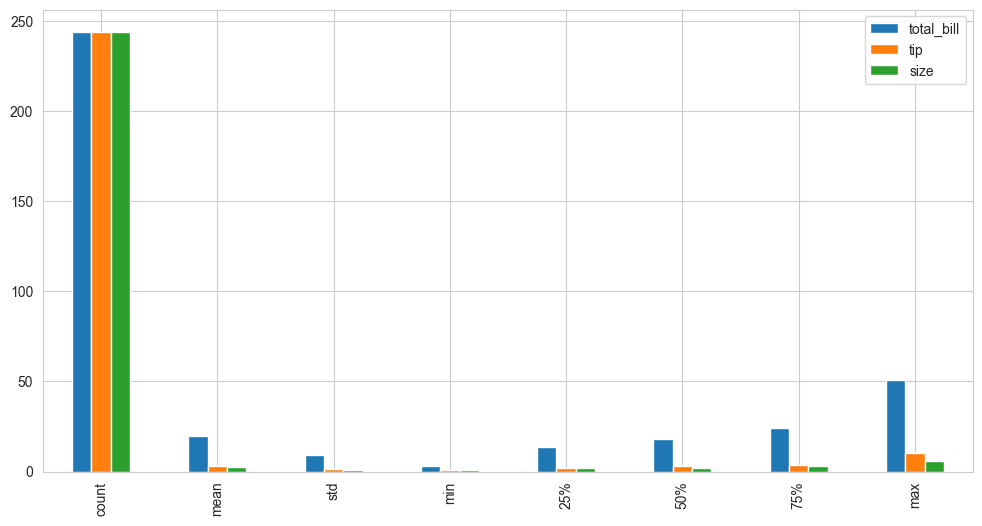

In [6]:
df.describe().plot(kind="bar",figsize=(12,6))

In [7]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Data Cleaning & Handling

In [8]:
df.isna().sum()
df.duplicated().sum()
df.loc[df.duplicated()]


,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


# EDA & Visualization

In [ ]:
df["tip_percentage"] = (df["tip"] / df["total_bill"]) * 100  # Creating a “Tip Percentage” column — because context matters. A $10 tip on a $200 bill isn’t the same as a $10 tip on a $40 meal.
df["tip_percentage"] = df["tip_percentage"].round(2)

In [26]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


In [31]:
# 1. Histogram of Tip Percentage
fig1 = px.histogram(
    df, x="tip_percentage",
    title="Distribution of Tip Percentage",
    labels={"tip_percentage": "Tip Percentage"},
    nbins=30,
    width=1000, height=500
)
fig1.show()

# 2. Box Plot of Tip Percentage by Gender
fig2 = px.box(
    df, x="sex", y="tip_percentage", color="sex",
    title="Tip Percentage by Gender",
    labels={"tip_percentage": "Tip Percentage", "sex": "Gender"},
    width=1000, height=500
)
fig2.show()

# 3. Violin Plot of Tip Percentage by Time (Lunch/Dinner)
fig3 = px.violin(
    df, x="time", y="tip_percentage", color="time", box=True,
    title="Tip Percentage Distribution by Time of Day",
    labels={"tip_percentage": "Tip Percentage", "time": "Time"},
    width=1000, height=500
)
fig3.show()




In [10]:
def high_low(col):
    print(f"{col} Max value:", df[col].max())
    print(f"{col} Min value:", df[col].min())

high_low('tip')
high_low("total_bill")
high_low("size")



tip Max value: 10.0
tip Min value: 1.0
total_bill Max value: 50.81
total_bill Min value: 3.07
size Max value: 6
size Min value: 1


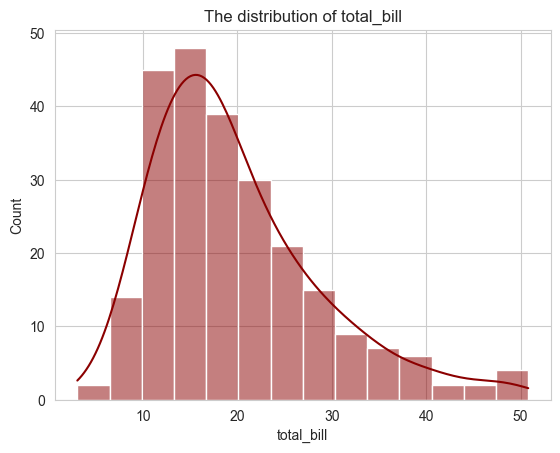

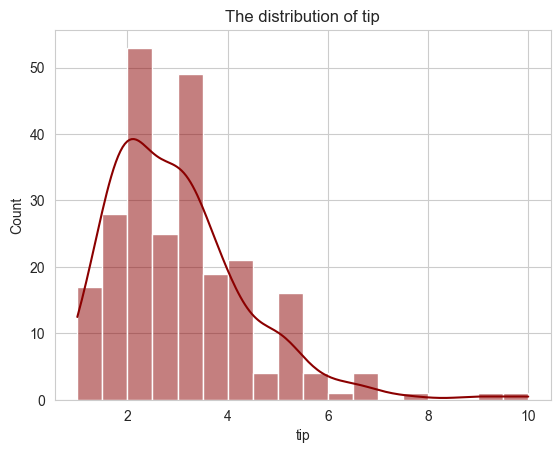

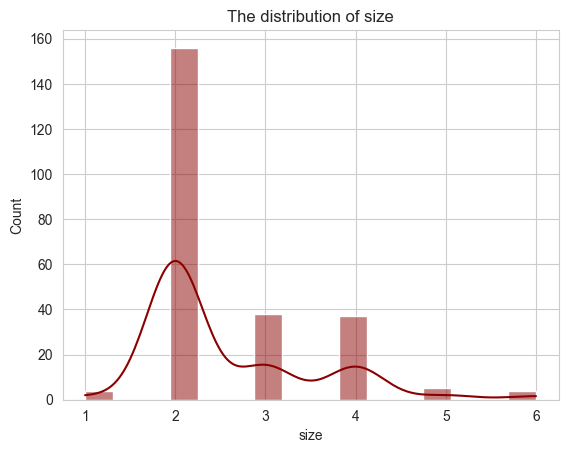

In [11]:
for col in  df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=col,kde=True,color="darkred")
    plt.title(f"The distribution of {col}")
    plt.show()


In [12]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


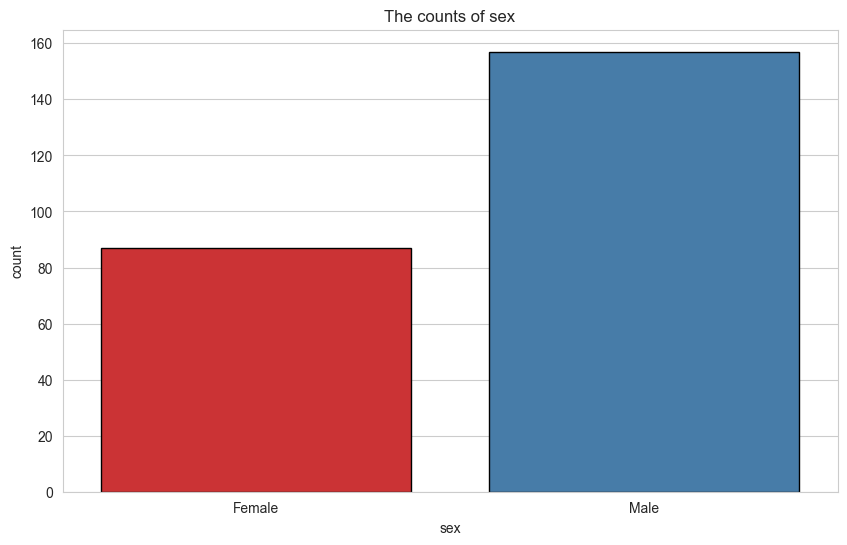

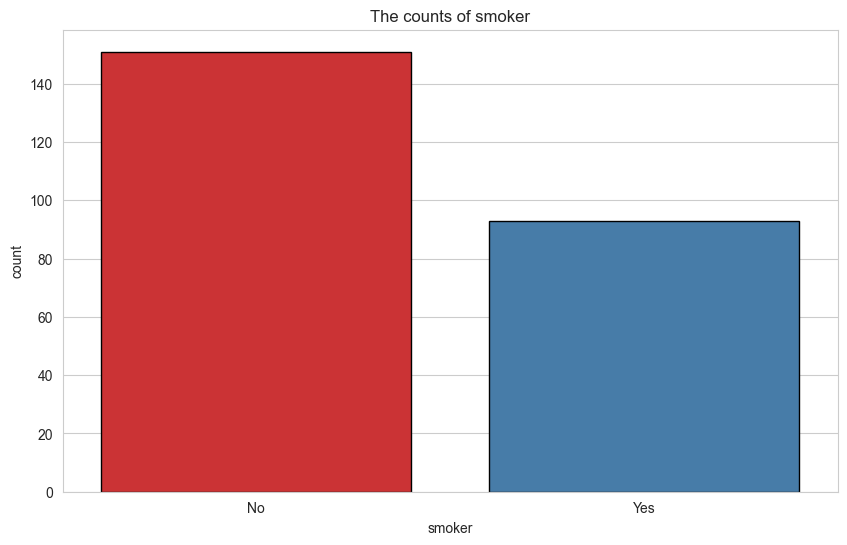

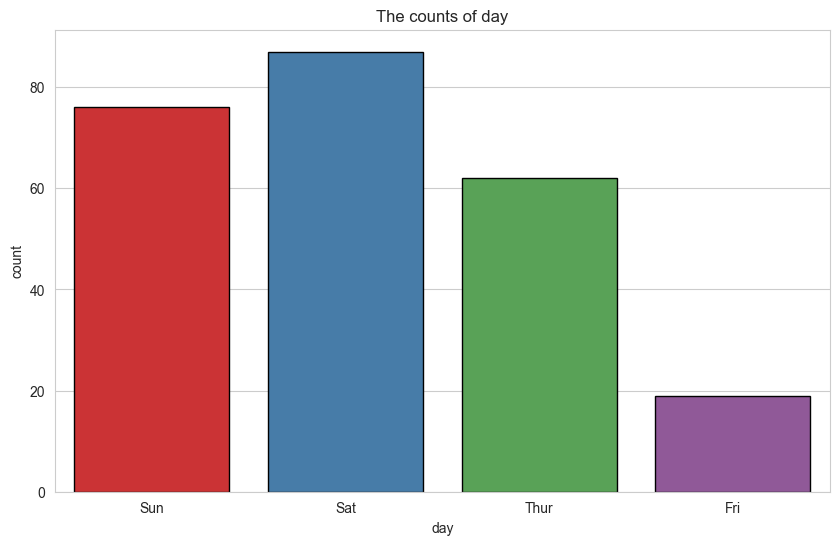

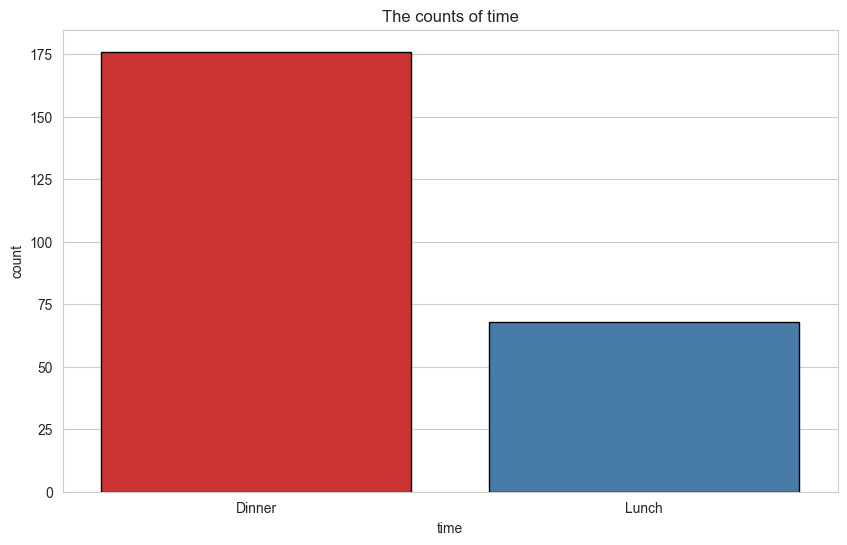

In [13]:
for col in df.select_dtypes(include="object").columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df,x=col,edgecolor="black",palette="Set1")
    plt.title(f'The counts of {col}')
    plt.show()

# Most tips given by which gender,the tip value and the time

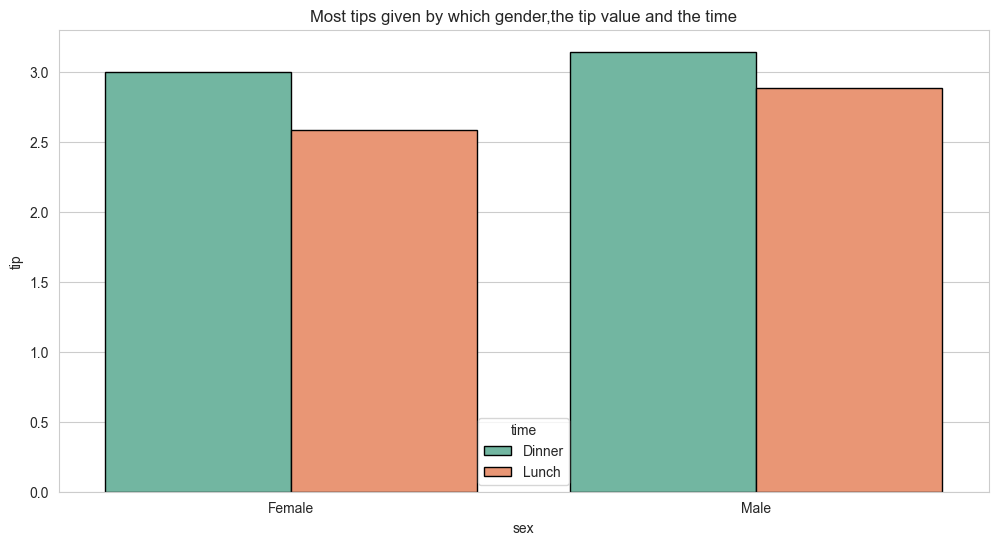

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x='sex',y='tip',hue="time",ci=None,edgecolor="black",palette="Set2")
plt.title("Most tips given by which gender,the tip value and the time")
plt.show()

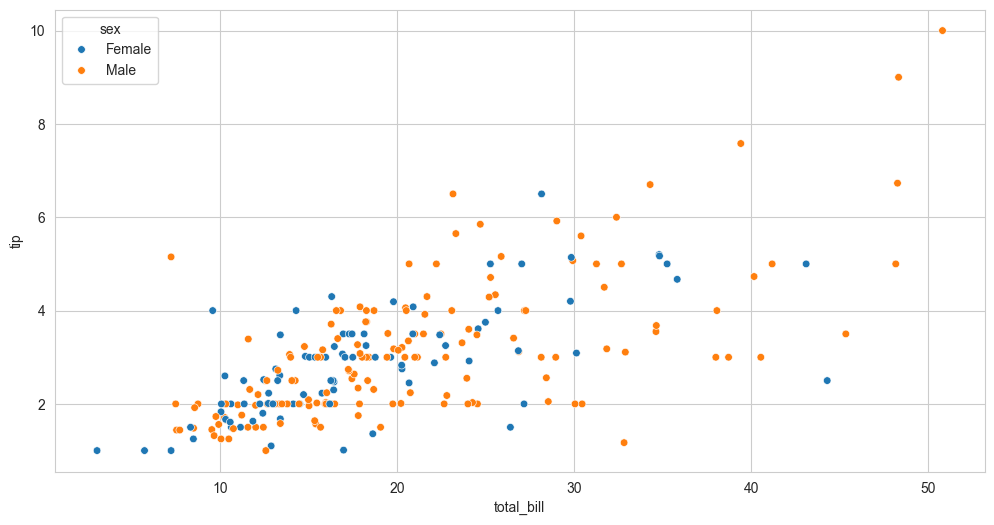

In [15]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x="total_bill",y="tip",hue="sex",s=30)
plt.show()

In [16]:
import plotly.express as px

fig = px.scatter(
    df,
    x="total_bill",
    y="tip",
    color="sex",
    title="Interactive Scatter Plot: Tip vs Total Bill by Gender",
    labels={"total_bill": "Total Bill", "tip": "Tip"},
    width=1000,
    height=500
)

fig.update_traces(marker=dict(size=6))  # Adjust point size
fig.show()


In [17]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


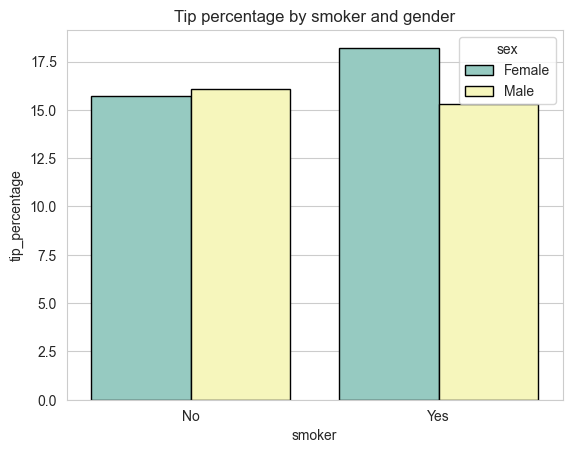

In [39]:
sns.barplot(data=df,x=df["smoker"],y=df["tip_percentage"],hue=df["sex"],ci=None,edgecolor="black",palette="Set3")
plt.title("Tip percentage by smoker and gender")
plt.show()

In [41]:
import plotly.express as px

fig1 = px.bar(
    df,
    x="smoker",
    y="tip_percentage",
    color="sex",
    barmode="group",
    title="Tip Percentage by Smoker and Gender",
    labels={"smoker": "Smoker Status", "tip_percentage": "Tip Percentage", "sex": "Gender"},
    width=1000,
    height=500
)
fig1.show()


In [19]:
# 3. Bar chart: average tip by time (Lunch/Dinner)
avg_tip_by_time = df.groupby("time", as_index=False)["tip"].mean()
fig3 = px.bar(
    avg_tip_by_time, x="time", y="tip", color="time",
    title="Average Tip by Time of Day",
    labels={"tip": "Average Tip", "time": "Time"},
    width=800, height=500
)
fig3.show()



# 5. Histogram: total_bill colored by sex
fig5 = px.histogram(
    df, x="total_bill", color="sex",
    title="Distribution of Total Bill by Gender",
    labels={"total_bill": "Total Bill"},
    nbins=30,
    width=1000, height=500
)
fig5.show()


In [20]:
import plotly.express as px

fig = px.scatter(
    df,
    x="size",
    y="tip",
    hover_data=["total_bill"],  # Wrap in a list
    title="Interactive Scatter Plot: Correlatiion Bteween Tip,Number of guest and total bill",
    labels={"total_bill": "Total Bill", "tip": "Tip"},
    width=1000,
    height=500
)

fig.update_traces(marker=dict(size=8))  # Optional: adjust point size
fig.show()


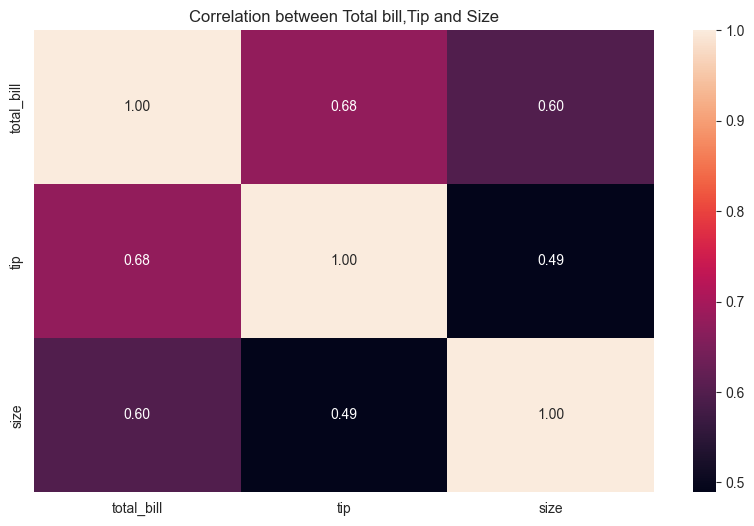

In [21]:
cor=df.select_dtypes(include="number").corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True,fmt=".2f")
plt.title("Correlation between Total bill,Tip and Size")
plt.show()